### 💻 Simple notebook for testing APC inference

In [ ]:
%load_ext autoreload
%autoreload 2

import os
import sys
os.environ["DISPLAY"] =':1'
os.environ['CUDA_VISIBLE_DEVICES'] = '0' # set GPU device
sys.path.append("apc/vision_modules")
import yaml
from box import Box
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# import APC pipeline
from apc.apc_pipeline import APC
from apc.utils import visualize_conversation, create_image_with_text
# set device
device_vlm = "cuda:0"
device_vision = "cuda:0"

### ✔️ Load APC Pipeline

In [ ]:
# load config
config_path = "apc/configs/qwenvl2_5_7b_instruct.yaml"
with open(config_path, "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
config = Box(config)

# load APC pipeline
apc = APC(config, device_vlm=device_vlm, device_vision=device_vision)

### ✔️ [Sample 1] Set input image and prompt

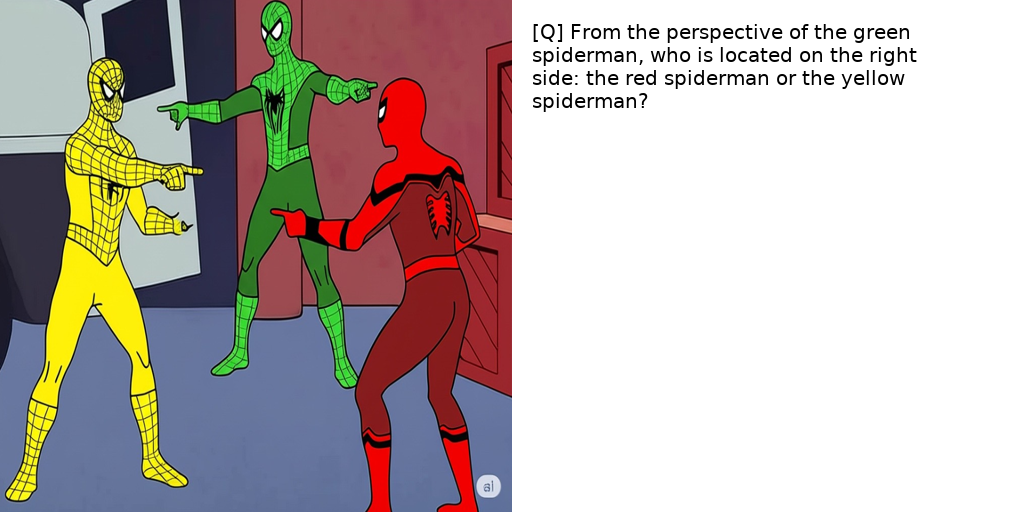

In [3]:
# load input image
image_path = "demo/sample_image_spiderman.png"
image = Image.open(image_path).convert("RGB").resize((512, 512))

# set prompt
prompt = "From the perspective of the green spiderman, who is located on the right side: the red spiderman or the yellow spiderman?"
save_dir = "outputs/demo/spiderman"

# visualize question
image_with_text = create_image_with_text(image, "[Q] " + prompt, fontsize=20)
image_with_text

### ✔️ Run APC

In [ ]:
os.makedirs(save_dir, exist_ok=True)

# run APC
# NOTE: for faster inference, set visualize_trace=False
response, conv_history = apc.run_apc(
    image,
    prompt,
    trace_save_dir=save_dir,
    perspective_prompt_type="visual",
    visualize_trace=True,
    visualize_scene_abstraction=True,
    return_conv_history=True,
)

# visualize conversation
conv_viz = visualize_conversation(
    conv_history,
    width=900,
    row_gap=0,
    font_size=13,
    image_max_width=180,
    output_path=os.path.join(save_dir, "conversation_viz.png")
)
conv_viz

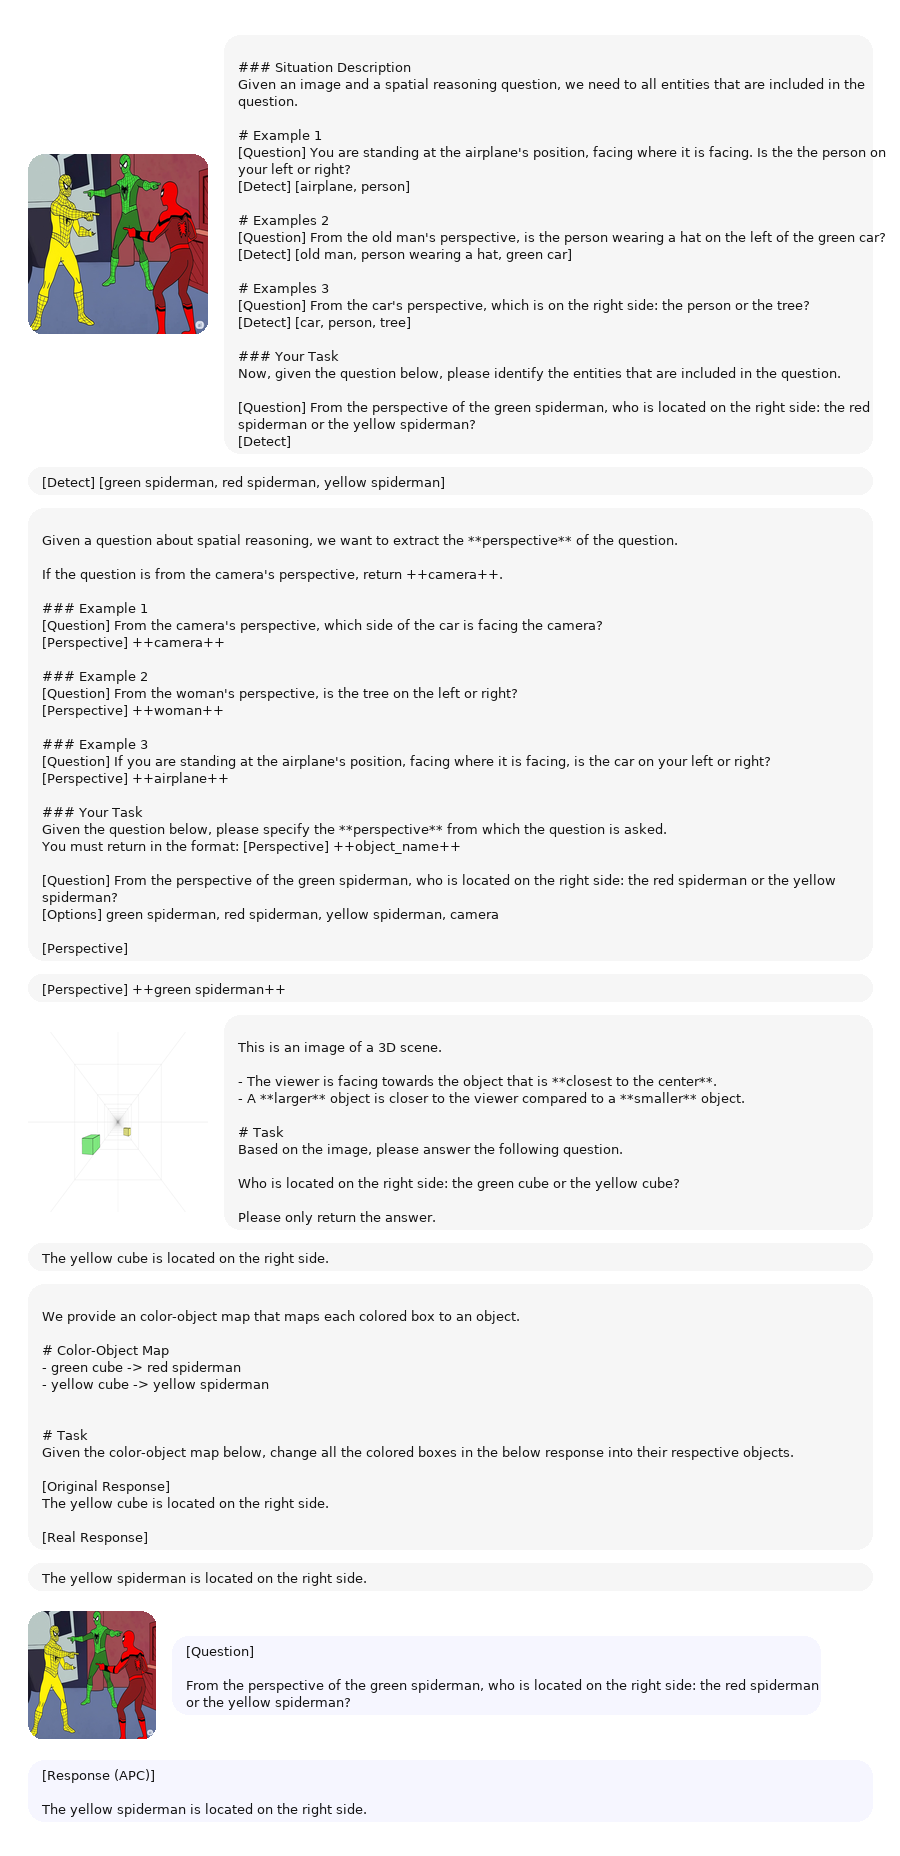

In [5]:
conv_viz

### ✔️ Run with a list of options

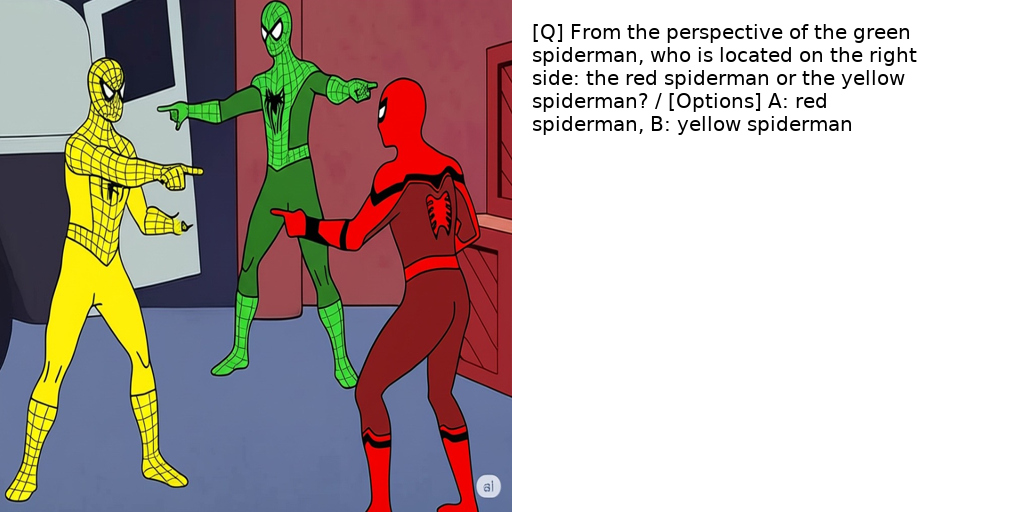

In [6]:
# load input image
image_path = "demo/sample_image_spiderman.png"
image = Image.open(image_path).convert("RGB").resize((512, 512))

# set prompt
prompt = "From the perspective of the green spiderman, who is located on the right side: the red spiderman or the yellow spiderman?"
# NOTE: add options
options = "A: red spiderman, B: yellow spiderman"
save_dir = "outputs/demo/spiderman"

# visualize question
image_with_text = create_image_with_text(image, "[Q] " + prompt + " / [Options] " + options, fontsize=20)
image_with_text

In [ ]:
# set prompt
os.makedirs(save_dir, exist_ok=True)

# run APC
response, conv_history = apc.run_apc(
    image,
    prompt,
    trace_save_dir=save_dir,
    perspective_prompt_type="visual",
    visualize_trace=True,
    visualize_scene_abstraction=True,
    return_conv_history=True,
    options=options,
)

# visualize conversation
conv_viz = visualize_conversation(
    conv_history,
    width=900,
    row_gap=0,
    font_size=13,
    image_max_width=180,
    output_path=os.path.join(save_dir, "conversation_viz.png")
)
conv_viz

In [ ]:
conv_viz

### ✔️ [Sample 2] Set input image and prompt

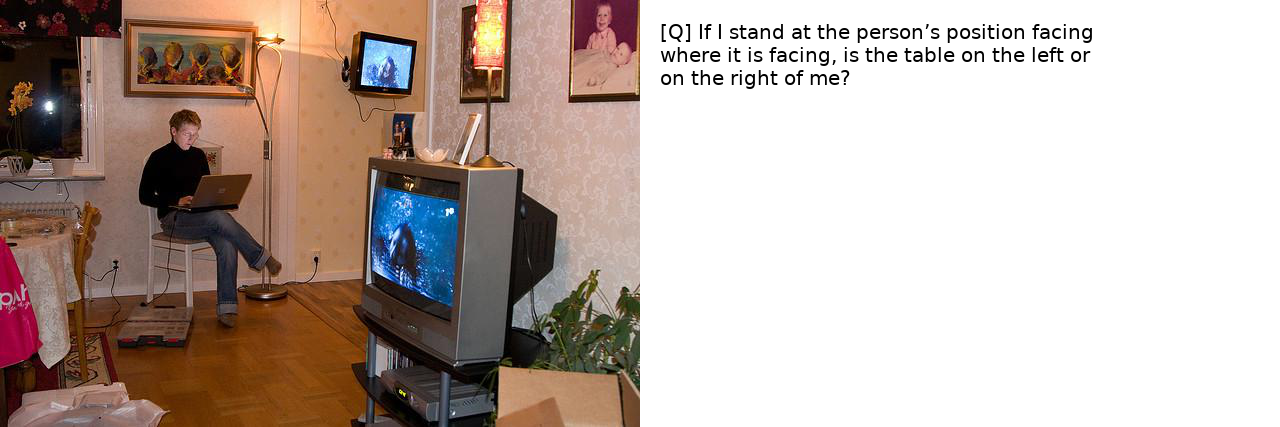

In [10]:
# load input image
image_path = "demo/sample_image_man.jpg"
image = Image.open(image_path).convert("RGB")

# set prompt
prompt = "If I stand at the person’s position facing where it is facing, is the table on the left or on the right of me?"
save_dir = "outputs/demo/man_table"

# visualize question
image_with_text = create_image_with_text(image, "[Q] " + prompt, fontsize=20)
image_with_text

In [ ]:
# set prompt
os.makedirs(save_dir, exist_ok=True)

# run APC
response, conv_history = apc.run_apc(
    image,
    prompt,
    trace_save_dir=save_dir,
    perspective_prompt_type="visual",
    visualize_trace=True,
    visualize_scene_abstraction=True,
    return_conv_history=True,
)

# visualize conversation
conv_viz = visualize_conversation(
    conv_history,
    width=900,
    row_gap=0,
    font_size=13,
    image_max_width=180,
    output_path=os.path.join(save_dir, "conversation_viz.png")
)
conv_viz

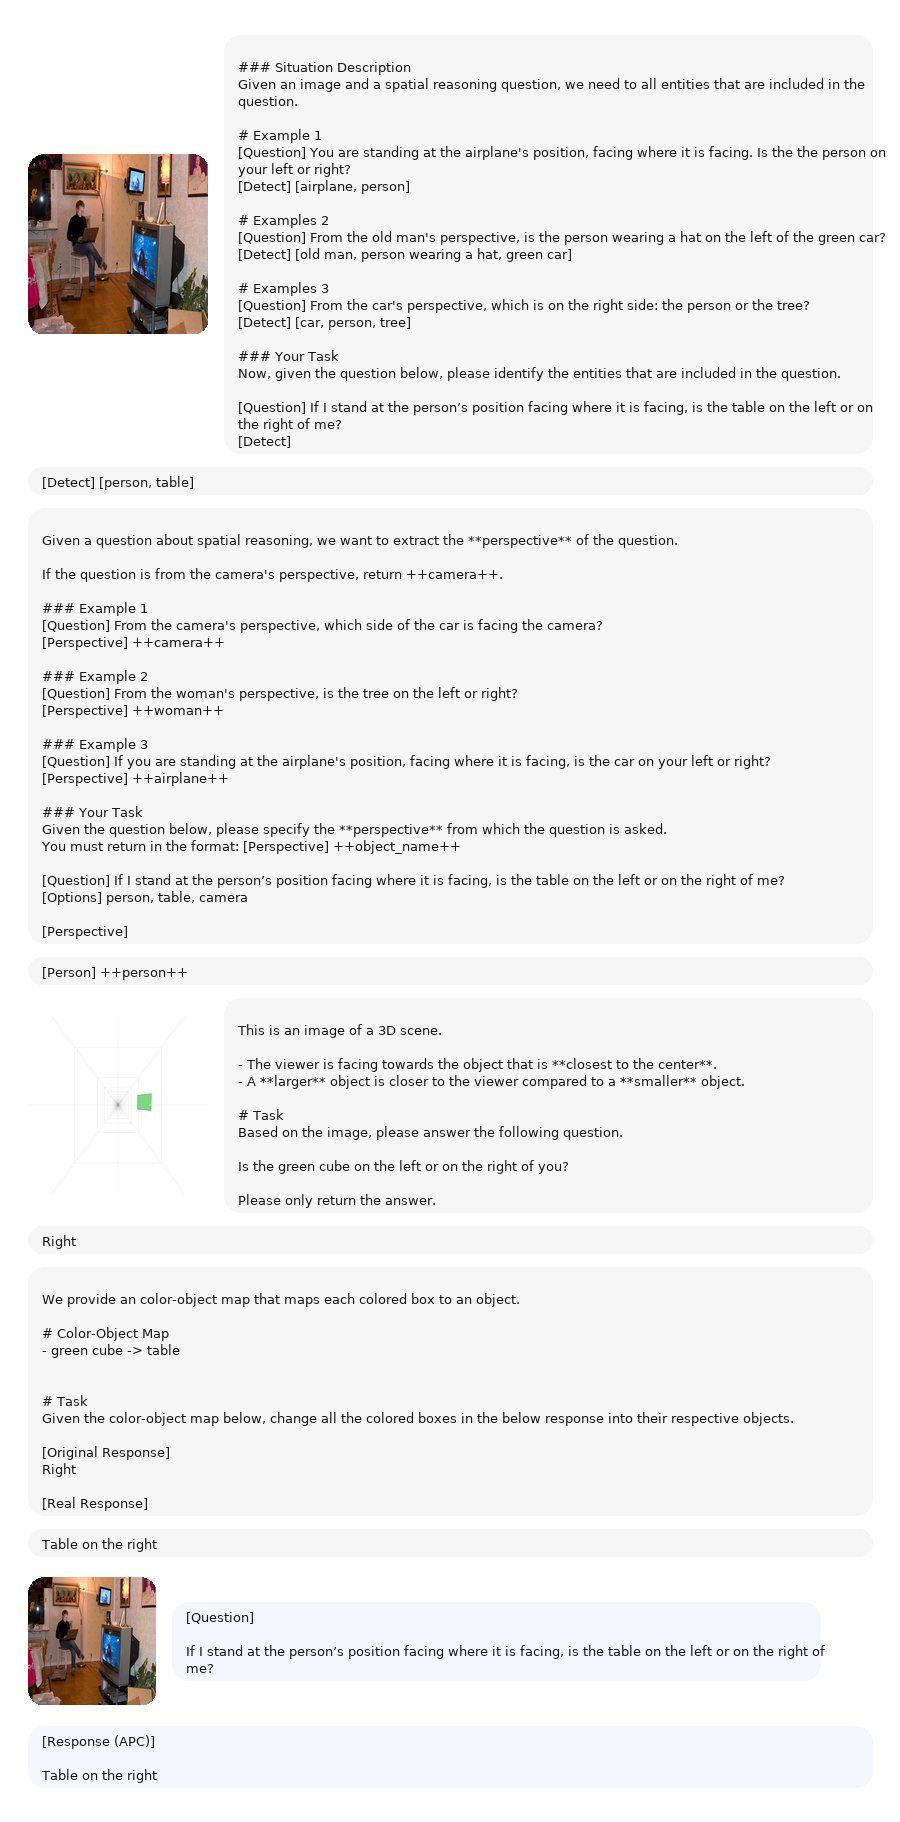

In [12]:
conv_viz

### ✔️ [Sample 3] Set input image and prompt

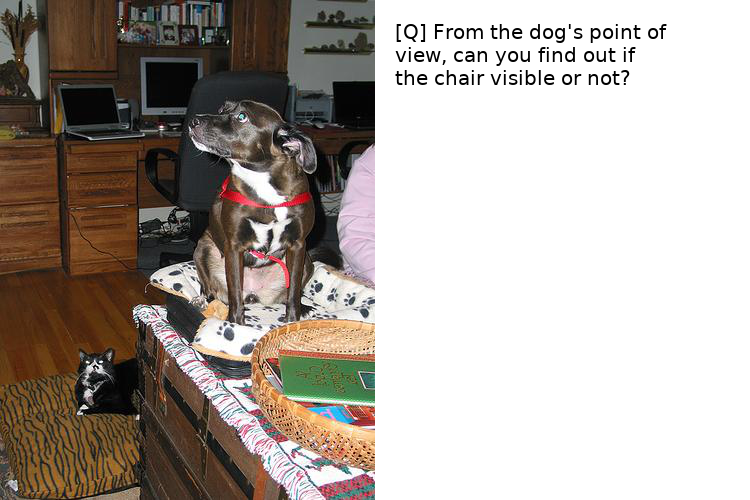

In [14]:
# load input image
image_path = "demo/sample_dog_chair.jpg"
image = Image.open(image_path).convert("RGB")

# set prompt
prompt = "From the dog's point of view, can you find out if the chair visible or not?"
save_dir = "outputs/demo/dog_chair"

# visualize question
image_with_text = create_image_with_text(image, "[Q] " + prompt, fontsize=20)
image_with_text

In [ ]:
# set prompt
os.makedirs(save_dir, exist_ok=True)

# run APC
response, conv_history = apc.run_apc(
    image,
    prompt,
    trace_save_dir=save_dir,
    perspective_prompt_type="visual",
    visualize_trace=True,
    visualize_scene_abstraction=True,
    return_conv_history=True,
)

# visualize conversation
conv_viz = visualize_conversation(
    conv_history,
    width=900,
    row_gap=0,
    font_size=13,
    image_max_width=180,
    output_path=os.path.join(save_dir, "conversation_viz.png")
)
conv_viz

### ✔️ [Sample 4] Set input image and prompt

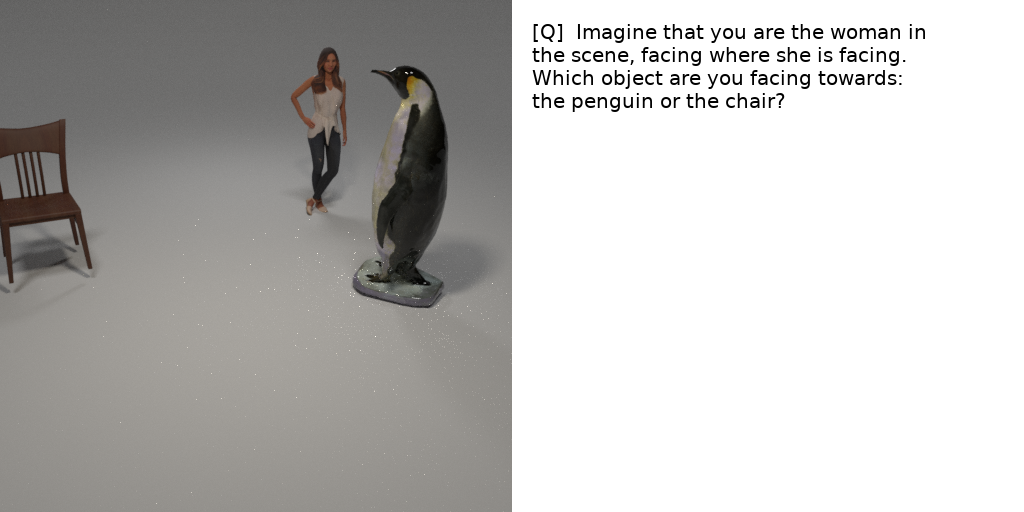

In [16]:
# load input image
image_path = "demo/sample_woman_chair.png"
image = Image.open(image_path).convert("RGB")

# set prompt
prompt = """
Imagine that you are the woman in the scene, facing where she is facing.
Which object are you facing towards: the penguin or the chair?
"""
save_dir = "outputs/demo/woman_chair"

# visualize question
image_with_text = create_image_with_text(image, "[Q] " + prompt, fontsize=20)
image_with_text

In [ ]:
# set prompt
os.makedirs(save_dir, exist_ok=True)

# run APC
response, conv_history = apc.run_apc(
    image,
    prompt,
    trace_save_dir=save_dir,
    perspective_prompt_type="visual",
    visualize_trace=True,
    visualize_scene_abstraction=True,
    return_conv_history=True,
)

# visualize conversation
conv_viz = visualize_conversation(
    conv_history,
    width=900,
    row_gap=0,
    font_size=13,
    image_max_width=180,
    output_path=os.path.join(save_dir, "conversation_viz.png")
)
conv_viz

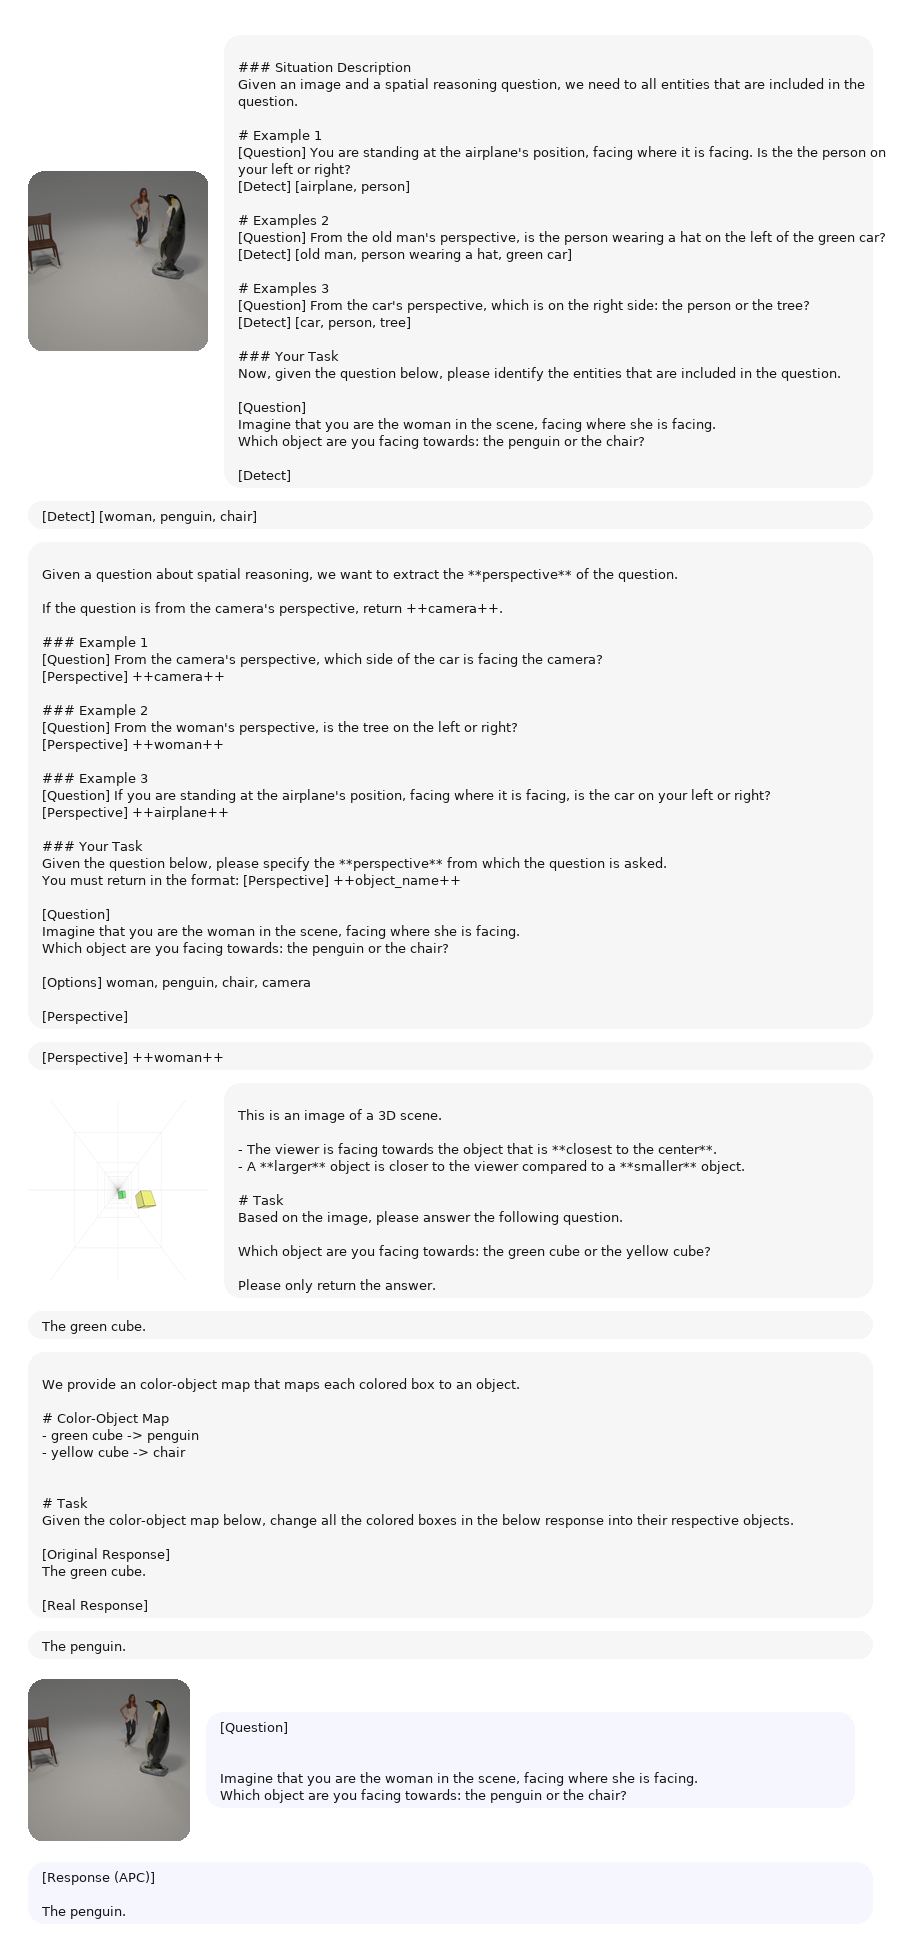

In [18]:
conv_viz